In [2]:
# 3.5.1 로이터 데이터셋
# 짧은 뉴스기사와 토픽의 집합이다.
# 46개의 토픽이 있으며, 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있다.
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

print(len(train_data))
print(len(test_data))

print(train_data[10])

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [3]:
# 3.5.2 데이터 준비
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


# def to_one_hot(labels, dimension = 46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
    
#     return results

# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
# 3.5.3 모델 구성
# 출력 클래스의 갯수가 46개로 늘어났다. 따라서, 규모가 큰 층을 사용한다.(64개의 유닛)
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape = (10000, )))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax")) # 46개의 출력 클래스에 대한 확률 분포를 위해 softmax 사용

model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["acc"])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# 3.5.4 훈련 검증
# 훈련 데이터에서 1000개의 샘플을 따로 떼어서 검증 세트로 사용한다.

# 검증 세트 준비하기
x_val = x_train[ : 1000]
partial_x_train = x_train[1000 : ]
y_val = one_hot_train_labels[ : 1000]
partial_y_train = one_hot_train_labels[1000 : ]

# 모델 훈련하기
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 556us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7204 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 4s 469us/step - loss: 1.4450 - acc: 0.6878 - val_loss: 1.3457 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 3s 415us/step - loss: 1.0951 - acc: 0.7648 - val_loss: 1.1704 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 3s 424us/step - loss: 0.8695 - acc: 0.8161 - val_loss: 1.0795 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 3s 419us/step - loss: 0.7032 - acc: 0.8480 - val_loss: 0.9846 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 3s 421us/step - loss: 0.5665 - acc: 0.8795 - val_loss: 0.9409 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 3s 430us/step - loss: 0.4580 - a

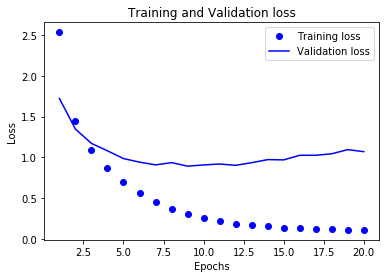

In [8]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

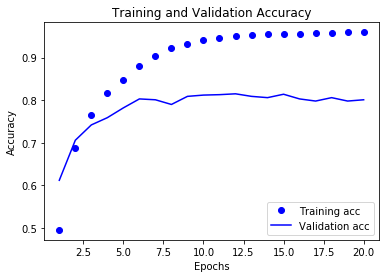

In [10]:
# 훈련과 검증 정확도 그리기
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# 9 번째 epoch 이후 과대적합이 시작됐다.

In [11]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape = (10000, )))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["acc"])

model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512, validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 510us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 3s 430us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 3s 405us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 3s 405us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 3s 416us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 3s 437us/step - loss: 0.5124 - acc: 0.8923 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 4s 446us/step - loss: 0.4123 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

[1.0222080231562112, 0.7756010686194165]

In [16]:
# 3.5.5 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)
print(predictions[0].shape) # 길이가 46인 vector
print(np.sum(predictions[0])) # 원소의 합 = 1
print(np.argmax(predictions[0])) # 가장 확률이 높은 클래스 = 3

(46,)
0.9999998
3


In [17]:
# 3.5.6 레이블과 손실을 다루는 다른 방법

# 정수 텐서로 변환
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# 이 방식을 사용한다면 손실 함수 하나만 바꾸면 된다.
model.compile(optimizer = "rmsprop", loss = "sparse_categorical_crossentropy", metrics = ["acc"])